In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
ds_train = pd.read_csv("train.csv")
ds_test = pd.read_csv("test.csv")

In [3]:
ds_train

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,0,0,1,0,0,0,2,0,...,0,0,6,0,0,3,0,0,0,Class_1
99996,99996,0,0,0,0,0,0,0,1,2,...,0,2,0,0,0,10,0,0,0,Class_2
99997,99997,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,2,0,Class_3
99998,99998,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,4,0,Class_2


In [4]:
ds_test

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149995,0,0,0,0,0,0,0,1,5,...,0,1,0,0,0,3,0,0,3,0
49996,149996,0,0,0,0,0,0,10,0,0,...,0,0,0,1,0,0,0,0,0,3
49997,149997,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
49998,149998,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
def null_values(dataset):
    for keys, values in dict(dataset.isna().sum()).items():
        if values!=0:
            print(keys,values)

In [6]:
null_values(ds_train)

In [7]:
null_values(ds_test)

In [8]:
ds_train.drop(columns="id",axis=1,inplace=True)
ds_test.drop(columns="id",axis=1,inplace=True)

In [9]:
ds_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,0,0,2,0,0,...,0,0,6,0,0,3,0,0,0,Class_1
99996,0,0,0,0,0,0,0,1,2,0,...,0,2,0,0,0,10,0,0,0,Class_2
99997,0,0,0,0,0,1,0,0,0,4,...,0,0,0,0,1,0,0,2,0,Class_3
99998,0,0,0,0,1,0,0,0,0,5,...,0,0,0,0,0,1,0,4,0,Class_2


In [10]:
ds_test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,0,0,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,2,0,7,7,...,3,0,1,0,0,0,1,0,2,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,6,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,6,9,14,3
4,0,0,0,0,0,0,1,0,4,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,1,5,0,...,0,1,0,0,0,3,0,0,3,0
49996,0,0,0,0,0,0,10,0,0,0,...,0,0,0,1,0,0,0,0,0,3
49997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,1,0,0,0,0,4,...,1,0,0,0,0,0,0,0,0,1


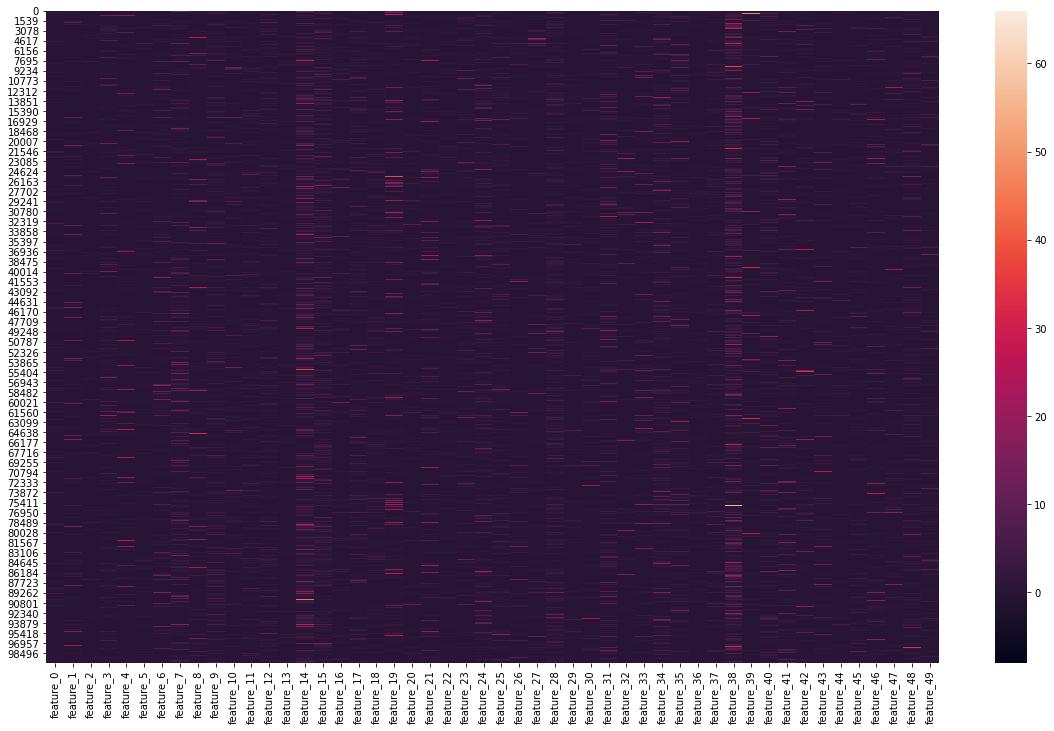

In [11]:
plt.figure(figsize=(20,12))
sns.heatmap(ds_train.iloc[:,:-1])
plt.show()

In [12]:
X = ds_train.iloc[:,:-1].values
y = ds_train.iloc[:,-1].values
X_test = ds_test.iloc[:,:].values

In [13]:
enc = LabelEncoder()

In [14]:
y = enc.fit_transform(y)

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [33]:
callback = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [36]:
keras.backend.clear_session()
tf.random.set_seed(0)
model = keras.models.Sequential([
    
    keras.layers.Dense(50,activation = 'elu', input_shape = [X_train.shape[1]],kernel_initializer = keras.initializers.he_normal()),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation = 'elu',kernel_initializer = keras.initializers.he_normal()),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation = 'elu',kernel_initializer = keras.initializers.he_normal()),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation = 'elu',kernel_initializer = keras.initializers.he_normal()),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation = 'elu',kernel_initializer = keras.initializers.he_normal()),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(4,  activation = 'sigmoid')
])

In [37]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid), callbacks=[callback])

Epoch 1/10
2344/2344 [==============================] - 5s 2ms/step - loss: 1.1424 - accuracy: 0.5608 - val_loss: 1.1221 - val_accuracy: 0.5710
Epoch 2/10
2344/2344 [==============================] - 5s 2ms/step - loss: 1.1115 - accuracy: 0.5763 - val_loss: 1.1136 - val_accuracy: 0.5710
Epoch 3/10
2344/2344 [==============================] - 5s 2ms/step - loss: 1.1077 - accuracy: 0.5763 - val_loss: 1.1147 - val_accuracy: 0.5712
Epoch 4/10
2344/2344 [==============================] - 5s 2ms/step - loss: 1.1053 - accuracy: 0.5764 - val_loss: 1.1174 - val_accuracy: 0.5714
Epoch 5/10
2344/2344 [==============================] - 6s 2ms/step - loss: 1.1034 - accuracy: 0.5764 - val_loss: 1.1114 - val_accuracy: 0.5713
Epoch 6/10
2344/2344 [==============================] - 6s 3ms/step - loss: 1.1015 - accuracy: 0.5764 - val_loss: 1.1113 - val_accuracy: 0.5711
Epoch 7/10
2344/2344 [==============================] - 6s 3ms/step - loss: 1.0985 - accuracy: 0.5765 - val_loss: 1.1120 - val_accuracy:

In [27]:
y_predict_probability = model.predict_proba(X_test)

In [28]:
y_predict_probability

array([[1.9984841e-02, 9.9999988e-01, 7.2511125e-01, 1.3982356e-03],
       [3.5216808e-03, 1.0000000e+00, 3.6920401e-11, 4.7385811e-07],
       [4.3017864e-03, 1.0000000e+00, 2.9620528e-03, 5.8241832e-01],
       ...,
       [3.3971667e-04, 1.0000000e+00, 2.6754439e-03, 1.5390515e-03],
       [4.8100412e-02, 9.9999988e-01, 1.6732365e-02, 3.0760467e-03],
       [7.5965524e-03, 1.0000000e+00, 9.7609460e-02, 1.6518566e-01]],
      dtype=float32)

In [29]:
y_predict = model.predict(X_test)

In [30]:
y_predict

array([[1.9984841e-02, 9.9999988e-01, 7.2511125e-01, 1.3982356e-03],
       [3.5216808e-03, 1.0000000e+00, 3.6920401e-11, 4.7385811e-07],
       [4.3017864e-03, 1.0000000e+00, 2.9620528e-03, 5.8241832e-01],
       ...,
       [3.3971667e-04, 1.0000000e+00, 2.6754439e-03, 1.5390515e-03],
       [4.8100412e-02, 9.9999988e-01, 1.6732365e-02, 3.0760467e-03],
       [7.5965524e-03, 1.0000000e+00, 9.7609460e-02, 1.6518566e-01]],
      dtype=float32)

In [36]:
predicted_probabilty = pd.DataFrame(y_predict, columns=["Class_1","Class_2","Class_3","Class_4"])
predicted_probabilty

,Class_1,Class_2,Class_3,Class_4
0,0.019985,1.0,7.251112e-01,1.398236e-03
1,0.003522,1.0,3.692040e-11,4.738581e-07
2,0.004302,1.0,2.962053e-03,5.824183e-01
3,0.999943,1.0,9.999872e-01,9.527521e-01
4,0.025841,1.0,5.664774e-01,8.268005e-02
...,...,...,...,...
49995,0.015830,1.0,2.816319e-04,2.597355e-07
49996,0.187097,1.0,8.377409e-02,7.591999e-02
49997,0.000340,1.0,2.675444e-03,1.539052e-03
49998,0.048100,1.0,1.673236e-02,3.076047e-03


In [34]:
ds_test_ID = pd.read_csv("test.csv")

In [35]:
ID = ds_test_ID.filter(["id"],axis=1)
ID

,id
0,100000
1,100001
2,100002
3,100003
4,100004
...,...
49995,149995
49996,149996
49997,149997
49998,149998


In [37]:
predicted_prob_output = pd.concat([ID,predicted_probabilty], axis=1)
predicted_prob_output

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.019985,1.0,7.251112e-01,1.398236e-03
1,100001,0.003522,1.0,3.692040e-11,4.738581e-07
2,100002,0.004302,1.0,2.962053e-03,5.824183e-01
3,100003,0.999943,1.0,9.999872e-01,9.527521e-01
4,100004,0.025841,1.0,5.664774e-01,8.268005e-02
...,...,...,...,...,...
49995,149995,0.015830,1.0,2.816319e-04,2.597355e-07
49996,149996,0.187097,1.0,8.377409e-02,7.591999e-02
49997,149997,0.000340,1.0,2.675444e-03,1.539052e-03
49998,149998,0.048100,1.0,1.673236e-02,3.076047e-03


In [38]:
predicted_prob_output.to_csv("predicted_ann.csv")